# Lab 05
First let us import the libraries and load the breast cancer wisconsin dataset.  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
dataset = datasets.load_breast_cancer()

In [3]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.Series(dataset.target)

#%5
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

data_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target)

## Measuring Similarity
In class you learned about similarity matrices. let's implement one and see how to implement and test your own 
functions in jupyter.

Let's try Russel-Rao similarity. In the space provided here implement the function to calculate the Russel-Rao 
similarity between two instances. 

In [5]:
def russel_rao(ins1, ins2):
    '''
    Russel-Rao similarity
    :param ins1: list - containing the features for instance 1
    :param ins2: list - containing the features for instance 2
    :return: float - russel_rao similarity index
    '''
    # TODO: implement it here.
    return

Now it is time to check whether your function is behaving correct. We can use unit tests for that. Here is an example of
 such a test.

In [5]:
ins_1 = [1, 1, 1, 0, 1]
ins_2 = [1, 0, 1, 0, 0]
rus_rao_similarity = russel_rao(ins_1, ins_2)

assert rus_rao_similarity == 0.4, 'Test failed.'

NameError: name 'russel_rao' is not defined

Assert function will raise an AssertionError if the condition fails. Add two more tests down here.

# Task 1
Similarly, implement a method to calculate cosine similarity of two instances.

In [ ]:
def cosine_sim(ins1, ins2):
    '''
    Cosine similarity
    :param ins1: list - containing the features for instance 1
    :param ins2: list - containing the features for instance 2
    :return: float - Cosine similarity
    '''
    # TODO: implement it here.
    return

In [6]:
ins1 = data_scaled.sample(1)
ins2 = data_scaled.sample(1)

Using cosine_sim method you developed, find the similarity between above instances.

## Feature Selection
In class we discussed the importance of feature selection. It is one of the most important parts of machine learning and
 has a huge impact on the performance of the model. In practise we use three main methods to select our best features.
 
 * Univariate selection
 * Tree-based feature selection
 * Using a correlation matrix
 
 These are just general methods to identify good features. Also, depend on the method you use, you can get different 
 sets of features as the best. 
 

### Univariate selection
Univariate feature selection works by selecting the best features based on univariate statistical tests. Sci-kit learn 
has the SelectKBest function that uses the univariate selection to select the best K features out of the feature(>K) set 
you have.

You can see the documentation of SelectKBest function [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

Let's see what are our best 7 features using ANOVA F-test statistical test. ANOVA is a statistical test we use to
measure how well a feature discriminate between multiple classes.

In [7]:
best_features = SelectKBest(score_func=f_classif, k=7).fit(data, target)

dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(data.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(7,'Score'))

                   Specs       Score
27  worst concave points  964.385393
22       worst perimeter  897.944219
7    mean concave points  861.676020
20          worst radius  860.781707
2         mean perimeter  697.235272
23            worst area  661.600206
0            mean radius  646.981021


### Tree-based feature selection
Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to 
compute impurity-based feature importances, which in turn can be used to discard irrelevant features.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is 
the feature towards your output variable.

We will use Extra Tree Classifier for extracting the top 10 features for the dataset.

<AxesSubplot:>

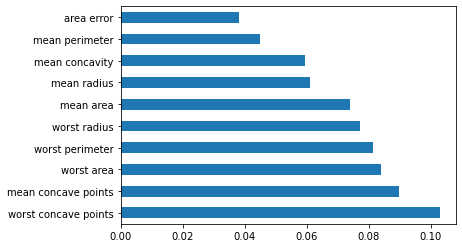

In [8]:
tree = ExtraTreesClassifier()
tree.fit(data, target)

df_feature_importances = pd.Series(tree.feature_importances_, index=data.columns)
df_feature_importances.nlargest(10).plot(kind='barh')

### Correlation matrix
Correlation states how the features are related to each other or the target variable. It can be either positive or 
negative. So the values that are closer to 1 and -1 are really good and values closer to 0 from both sides are not good. 

We will use a heatmap to identify correlations easily. 

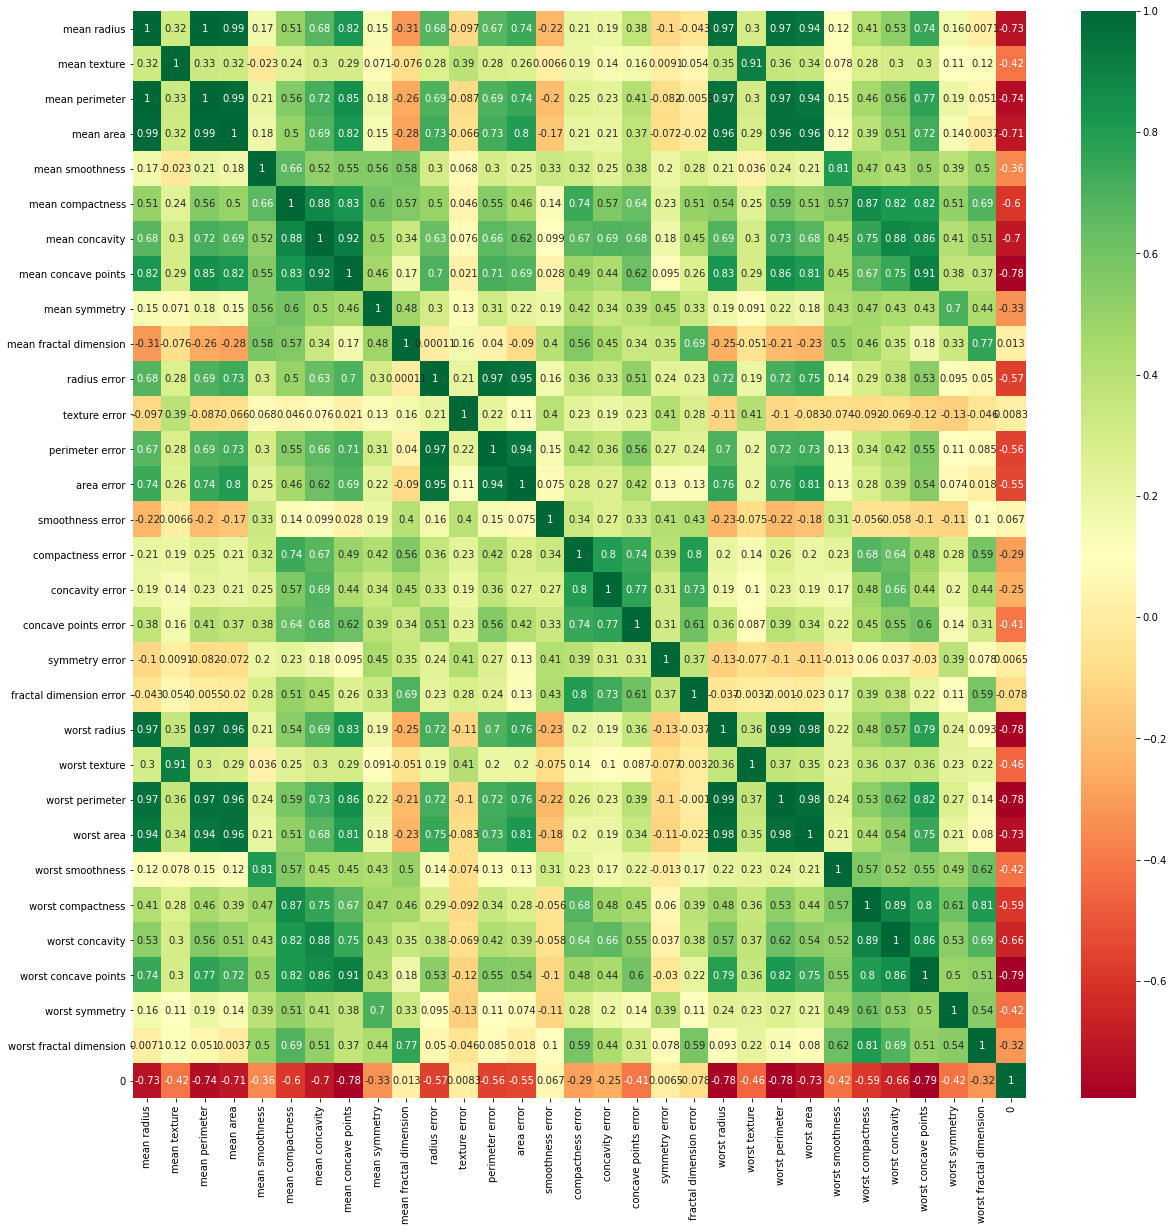

In [9]:
combine = pd.concat([data, target], axis=1)
corr_mat = combine.corr()

plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

If you observe the last raw and column, you can see that all the good features are inversely correalted
to the target feature.

# Task
* Import your cleaned dataset from week 3 here.
* Train a KNN model for the data using all the features and measure its performance.
* Use one of the feature selection methods and identify a set of features that are better compared to others.
* Train another KNN model only using those selected features and measure the performace.
* Compare results of the models.